In [2]:
import numpy as np

#Load XYZ file
xyz_file = r"./salt_3UC.xyz"
species = np.loadtxt(xyz_file, skiprows = 2, usecols = (0,), dtype = str)
posns = np.loadtxt(xyz_file, skiprows = 2, usecols = (1,2,3))
N_atoms = len(species)
print(N_atoms)
species_map = {"Na" : 1, "Cl" : 2}
charge_map = {"Na" : 1, "Cl" : -1}

216


In [142]:
# Make a random 14.05 x 14.05 2D box with 10 point charges 

14.05 * np.random.rand(20).reshape(10, 2)

posns_2D = 14.05 * np.random.rand(20).reshape(10, 2)
charges_2D = 2*np.random.randint(0, 2, 10)-1


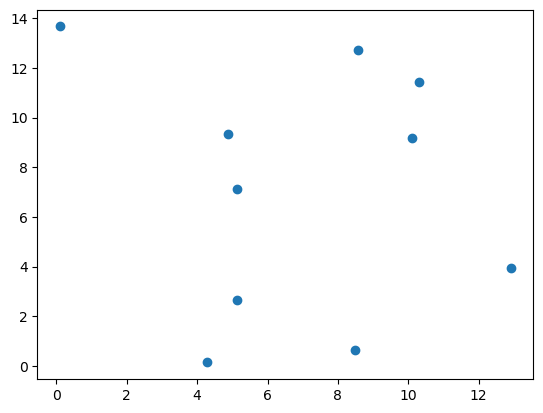

In [122]:
# Plot 
import matplotlib.pyplot as plt
plt.scatter(posns_2D[:,0], posns_2D[:,1])
plt.show()


In [177]:
# 2D direct summation 

def directSum_2D(r, q, a, n=10):
    U = 0 
    charges = len(q)
    vecs = np.arange(-n, n+1)
    for idx in range(charges):
        for idx2 in range(charges):
            for i in vecs:
                for j in vecs:
                    if i == 0 and j == 0 and idx == idx2:
                        continue
                    dist = np.linalg.norm(r[idx] - r[idx2] + i*a[0] + j*a[1])
                    if dist == 0:
                        continue 
                    U += q[idx]*q[idx2]/dist
    return U/2

def directSum_3D(r, q, a, n=2):
    U = 0 
    charges = len(q)
    vecs = np.arange(-n, n+1)
    for idx in range(charges):
        for idx2 in range(charges):
            for i in vecs:
                for j in vecs:
                    for k in vecs:
                        if i == 0 and j == 0 and k == 0 and idx == idx2:
                            continue
                        dist = np.linalg.norm(r[idx] - r[idx2] + i*a[0] + j*a[1] + k*a[2])
                        if dist == 0:
                            continue
                        U += q[idx]*q[idx2]/dist
    return U/2
                    










# 4th order B-spline
def M(u):
    return np.where((u >= 0) & (u <= 2), 1 - np.abs(1 - u), 0)


def BSpline(u):
    M_not = M(u)
    M_minus = M(u-1)
    M_minus_minus = M(u-2)
    return (u/3) * ((u/2)*M_not + ((3-u)/2)*M_minus) + ((4-u)/3)*(((u-1)/2)*M_minus + ((4-u)/2)*M_minus_minus)

def b(m, K, l=4):
    # Complex number i 
    i = complex(0,1)
    k = np.arange(0,l-1)
    return np.exp(2*np.pi*i*(m/K)*(l-1))/np.sum(BSpline(k+1)*np.exp(2*np.pi*i*(m/K)*(k)))




def Q(m, K, q, u, l=4, n=5):
    # Complex number i 
    i = complex(0,1)
    charges = len(q)
    outerSum = 0 
    integers = np.arange(0, n+1)

    for idx in range(charges):
        innerSum = 0
        for n1 in integers:
            for n2 in integers:
                for n3 in integers:
                    innerSum += BSpline(u[idx, 0] - m[0] - n1*K[0])*BSpline(u[idx, 1] - m[1] - n2*K[1])*BSpline(u[idx, 2] - m[2] - n3*K[2])
        outerSum += q[idx]*innerSum
    return outerSum


def S(m, K, q, u, l=4, n=5):
    # Complex number i 
    return b(m[0], K[0])*b(m[1], K[1])*b(m[2], K[2])*np.fft.fft([Q(m, K, q, u, l, n)])
        

        
def Q_2D(m, K, q, u, l=4, n=5):
    # Complex number i 
    i = complex(0,1)
    charges = len(q)
    outerSum = 0 
    integers = np.arange(0, n+1)

    for idx in range(charges):
        innerSum = 0
        for n1 in integers:
            for n2 in integers:
                    innerSum += BSpline(u[idx, 0] - m[0] - n1*K[0])*BSpline(u[idx, 1] - m[1] - n2*K[1])
        outerSum += q[idx]*innerSum
    return outerSum


def S_2D(m, K, q, u, l=4, n=5):
    # Complex number i 
    return b(m[0], K[0])*b(m[1], K[1])*np.fft.fft([Q_2D(m, K, q, u, l, n)])

    






In [4]:
# Get charges and corrdinates 
q = np.zeros(N_atoms)
r = np.zeros((N_atoms, 3))
for i in range(N_atoms):
    q[i] = charge_map[species[i]]
    r[i] = posns[i]

In [144]:
q_2D = charges_2D
r_2D = posns_2D

In [146]:
# Define unit vectors  
a1 = np.array([14.05, 0, 0])
a2 = np.array([0, 14.05, 0])
a3 = np.array([0, 0, 14.05])

# Define recirpocal vectors
a1_star = np.array([1/14.05, 0, 0])
a2_star = np.array([0, 1/14.05, 0])
a3_star =  np.array([0, 0, 1/14.05])

# Make order for the m vectors 
order = 2 
m = np.arange(-order, order+1)


In [185]:
n = [0, 1, 2, 3, 4, 5]

energies = [directSum_3D(r, q, [a1, a2, a3], n=n[0]), directSum_3D(r, q, [a1, a2, a3], n=n[1]), directSum_3D(r, q, [a1, a2, a3], n=n[2]), directSum_3D(r, q, [a1, a2, a3], n=n[3]), directSum_3D(r, q, [a1, a2, a3], n=n[4]), directSum_3D(r, q, [a1, a2, a3], n=n[5])]

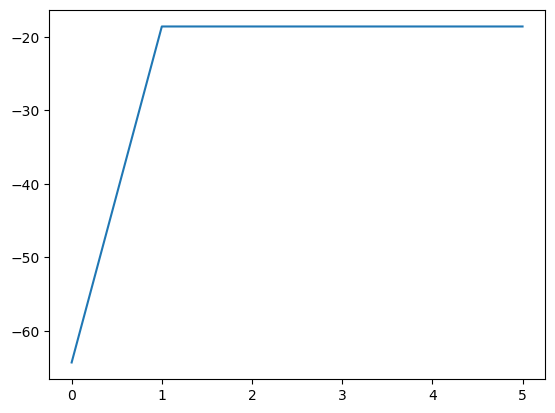

In [200]:
import matplotlib.pyplot as plt
plt.plot(n, energies)
plt.show()

In [11]:
# Steps of PME algorithm
'''
1. Define grid and perform B-spine interpolation
2. ...
'''

0.0

In [32]:
# 1. Define grid and perform B-spine interpolation
K1, K2, K3 = 21, 21, 21 # Split the grid into K1 x K2 x K3 cells
K = [K1, K2, K3]
a_star = [a1_star, a2_star, a3_star]

# Define fractional coordinates for each particle 
u = np.zeros((N_atoms, 3))
for i in range(N_atoms):
    for j in range(3):
        u[i][j] = K[j] * a_star[j].dot(r[i])


In [148]:
# 1. Define grid and perform B-spine interpolation
K1, K2, K3 = 21, 21, 21 # Split the grid into K1 x K2 x K3 cells
K_2D = [K1, K2]
a_star_2D = [a1_star, a2_star]

# Define fractional coordinates for each particle 
u_2D = np.zeros((10, 2))
for i in range(10):
    for j in range(2):
        u_2D[i][j] = K[j] * a_star[j][:2].dot(r_2D[i])

In [170]:


k = np.arange(0, 10)
structureFactor = np.zeros((len(k), len(k)))

for k1 in k:
    for k2 in k:
            structureFactor[k1, k2] = np.real(S_2D([k1, k2], K, q, u, n=2))

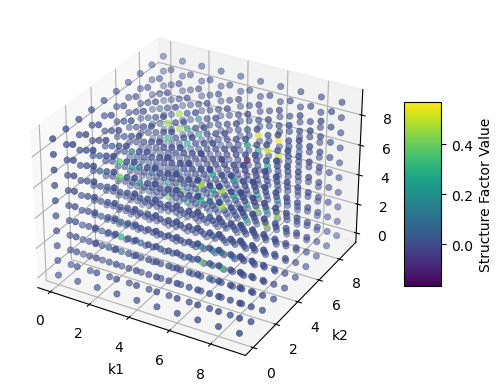

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming structureFactor is your 10x10x10 tensor
# Example: structureFactor = np.random.rand(10, 10, 10)

# Create a 10x10x10 grid
k1, k2, k3 = np.meshgrid(np.arange(10), np.arange(10), np.arange(10))

# Reshape the grid and structureFactor for plotting
k1 = k1.flatten()
k2 = k2.flatten()
k3 = k3.flatten()
structureFactor_flattened = structureFactor.flatten()

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(k1, k2, k3, c=structureFactor_flattened, cmap='viridis', linewidth=0.5)

# Set labels
ax.set_xlabel('k1')
ax.set_ylabel('k2')
ax.set_zlabel('k3')


cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Structure Factor Value')

# Show plot
plt.show()


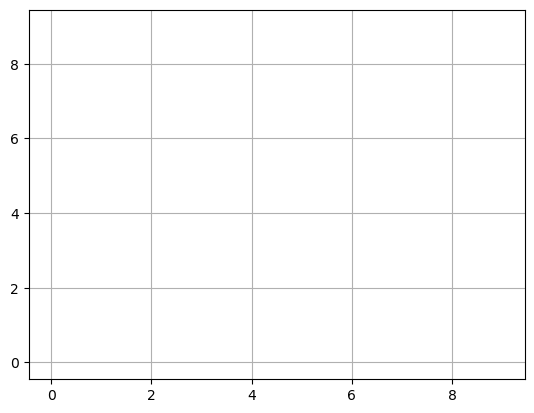

In [171]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming structureFactor is your 10x10x10 tensor
# For demonstration, using a slice of random data for structureFactor


# Selecting a 2D slice of the structureFactor
structureFactor_2D = structureFactor

# Create a 10x10 grid
k1, k2 = np.meshgrid(np.arange(10), np.arange(10))

# Flatten the grid for plotting
k1_flattened = k1.flatten()
k2_flattened = k2.flatten()
structureFactor_flattened = structureFactor_2D.flatten()

# Define colors based on sign: e.g., red for positive, blue for negative
colors = np.where(structureFactor_flattened > 0, 'red', 'blue')

# Define sizes based on the absolute value of the structure factor
size_scale = 100
sizes = np.abs(structureFactor_flattened) * size_scale

# Plotting
fig, ax = plt.subplots()

# Scatter plot with sizes based on magnitude and colors based on sign
sc = ax.scatter(k1_flattened, k2_flattened, s=sizes, color=colors)

# Set labels


ax.grid(True)


# Show plot
plt.show()


